In [1]:
import numpy as np
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from keras.models import Sequential, Input
from keras.models import Model
from keras.layers import Dense, Dropout
from hyperopt import Trials, STATUS_OK, tpe
from hyperas import optim
from hyperas.distributions import choice, uniform
import os

Using TensorFlow backend.


In [2]:
os.chdir('C:\\Users\\s114sing\\OneDrive - Nokia\\Training Material\\Hackathon\\telecom-customer')
#data = pd.read_csv('Telecom_customer_churn_data_manipulation_2.csv')
data = pd.read_csv('Telecom_Manipulated_Data.csv')

In [3]:
data.dtypes

rev_Mean       float64
mou_Mean       float64
totmrc_Mean    float64
da_Mean        float64
ovrmou_Mean    float64
                ...   
kid11_15         int64
kid16_17         int64
creditcd         int64
eqpdays        float64
Customer_ID      int64
Length: 100, dtype: object

In [4]:
data.describe()

,rev_Mean,mou_Mean,totmrc_Mean,da_Mean,ovrmou_Mean,ovrrev_Mean,vceovr_Mean,datovr_Mean,roam_Mean,change_mou,...,forgntvl,ethnic,kid0_2,kid3_5,kid6_10,kid11_15,kid16_17,creditcd,eqpdays,Customer_ID
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,...,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,1.000000e+05
mean,58.719985,513.559937,46.179136,0.888828,41.072247,13.559560,13.295062,0.261318,1.286405,-13.933818,...,0.057974,10.110500,1.040120,1.046960,1.080730,1.08814,1.099640,1.689660,392.456789,1.050000e+06
std,46.208972,524.229868,23.581283,2.173729,97.122320,30.446392,30.002391,3.120946,14.685090,274.854774,...,0.231663,3.700514,0.196242,0.211554,0.272421,0.28350,0.299521,0.462635,256.076848,2.886766e+04
min,-6.167500,0.000000,-26.915000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-3875.000000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,0.000000,1.000001e+06
25%,33.311875,151.500000,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-86.000000,...,0.000000,7.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,212.000000,1.025001e+06
50%,48.377500,357.500000,44.990000,0.247500,3.000000,1.050000,0.700000,0.000000,0.000000,-7.000000,...,0.000000,10.000000,1.000000,1.000000,1.000000,1.00000,1.000000,2.000000,342.000000,1.050000e+06
75%,70.630000,701.250000,59.990000,0.888828,42.000000,14.350000,13.950000,0.000000,0.257500,61.750000,...,0.000000,14.000000,1.000000,1.000000,1.000000,1.00000,1.000000,2.000000,530.000000,1.075000e+06
max,3843.262500,12206.750000,409.990000,159.390000,4320.750000,1102.400000,896.087500,423.540000,3685.200000,31219.250000,...,1.000000,17.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000,1823.000000,1.100000e+06


In [5]:

Y = data['churn'].values #churn values to be predicted  
X = data.drop(columns= ['churn']) # values without churn
X = X.drop(columns= ['Customer_ID'])

# Create Train & Test Data
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
np.shape(X_train)

(80000, 98)

In [6]:
model = Sequential()
model.add(Dense(64, input_dim=98, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.fit(X_train, Y_train,
          epochs=2,batch_size=10000)
_, accuracy = model.evaluate(X_test, Y_test)
print('Accuracy: %.2f' % (accuracy*100))

Epoch 1/2
80000/80000 [==============================] - ETA: 18s - loss: 1665.1620 - accuracy: 0.49 - ETA: 8s - loss: 1599.1215 - accuracy: 0.4977 - ETA: 4s - loss: 1517.6455 - accuracy: 0.495 - ETA: 3s - loss: 1439.3126 - accuracy: 0.494 - ETA: 1s - loss: 1369.4426 - accuracy: 0.496 - ETA: 1s - loss: 1307.3574 - accuracy: 0.496 - ETA: 0s - loss: 1244.8177 - accuracy: 0.497 - 4s 44us/step - loss: 1192.3829 - accuracy: 0.4970
Epoch 2/2
20000/20000 [==============================] - ETA: 1: - ETA: 2s - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - 1s 40us/step
Accuracy: 50.13


In [7]:
n_layers = 3
inputs = Input(shape=(98,))
x = Dense(200,activation='relu')(inputs)
for layer in range(n_layers -1):
    x = Dense(200,activation='relu')(x)
    
output = Dense(1,activation='sigmoid')(x)

#create Deep Nueral Network Model
dnn = Model(inputs,output)
dnn.compile(optimizer='rmsprop',
            loss='binary_crossentropy',
              metrics=['accuracy'])
dnn.fit(X_train, Y_train,
          epochs=1,batch_size=1000)

Epoch 1/1
80000/80000 [==============================] - ETA: 1:03 - loss: 172.9381 - accuracy: 0.46 - ETA: 33s - loss: 769.9282 - accuracy: 0.4800 - ETA: 17s - loss: 515.6029 - accuracy: 0.500 - ETA: 12s - loss: 408.8709 - accuracy: 0.504 - ETA: 9s - loss: 344.1115 - accuracy: 0.502 - ETA: 7s - loss: 299.8123 - accuracy: 0.50 - ETA: 6s - loss: 269.3487 - accuracy: 0.50 - ETA: 5s - loss: 243.1703 - accuracy: 0.50 - ETA: 5s - loss: 226.2532 - accuracy: 0.50 - ETA: 4s - loss: 210.2186 - accuracy: 0.50 - ETA: 4s - loss: 197.3082 - accuracy: 0.50 - ETA: 3s - loss: 186.1313 - accuracy: 0.50 - ETA: 3s - loss: 183.8597 - accuracy: 0.50 - ETA: 3s - loss: 177.0789 - accuracy: 0.50 - ETA: 3s - loss: 169.3414 - accuracy: 0.50 - ETA: 3s - loss: 161.2906 - accuracy: 0.50 - ETA: 3s - loss: 154.3996 - accuracy: 0.50 - ETA: 2s - loss: 147.5095 - accuracy: 0.50 - ETA: 2s - loss: 141.5468 - accuracy: 0.50 - ETA: 2s - loss: 136.5658 - accuracy: 0.50 - ETA: 2s - loss: 131.1872 - accuracy: 0.50 - ETA: 2s -

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 98)                0         
_________________________________________________________________
dense_15 (Dense)             (None, 25)                2475      
_________________________________________________________________
dense_16 (Dense)             (None, 25)                650       
_________________________________________________________________
dense_17 (Dense)             (None, 20)                520       
_________________________________________________________________
dense_18 (Dense)             (None, 1)                 21        
Total params: 3,666
Trainable params: 3,666
Non-trainable params: 0
_________________________________________________________________
None


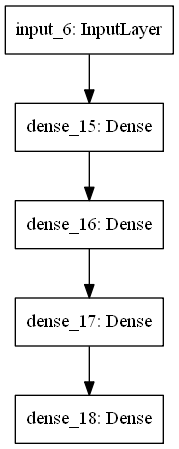

In [12]:
# Multilayer Perceptron
from keras.utils import plot_model
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
visible = Input(shape=(98,))
hidden1 = Dense(25, activation='relu')(visible)
hidden2 = Dense(25, activation='relu')(hidden1)
hidden3 = Dense(20, activation='relu')(hidden2)
output = Dense(1, activation='sigmoid')(hidden3)
model = Model(inputs=visible, outputs=output)
# summarize layers
print(model.summary())
# plot graph
plot_model(model, to_file='multilayer_perceptron_graph.png')

In [1]:
model.compile(optimizer='adam',
            loss='binary_crossentropy',
              metrics=['accuracy'])
model.fit(X_train, Y_train,
          epochs=1000,batch_size=500)

NameError: name 'model' is not defined

In [14]:
_, accuracy = model.evaluate(X_test, Y_test)
print('Accuracy: %.2f' % (accuracy*100))

20000/20000 [==============================] - ETA: 2: - ETA: 2s - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - 1s 32us/step
Accuracy: 61.72
